# Bike Sharing Assignment

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.


#### Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the dataset

In [316]:
#supress warnings

import warnings
warnings.filterwarnings('ignore')

In [317]:
#import numpy and pandas

import numpy as np
import pandas as pd

In [318]:
#read the dataset

df=pd.read_csv("day.csv")

In [319]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the dataframe

In [320]:
df.shape

(730, 16)

In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


As we can there are no missing values in the dataframe

In [322]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Data Visualization and Understanding

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [323]:
#import the libraries

import matplotlib.pyplot as plt
import seaborn as sns

In [324]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

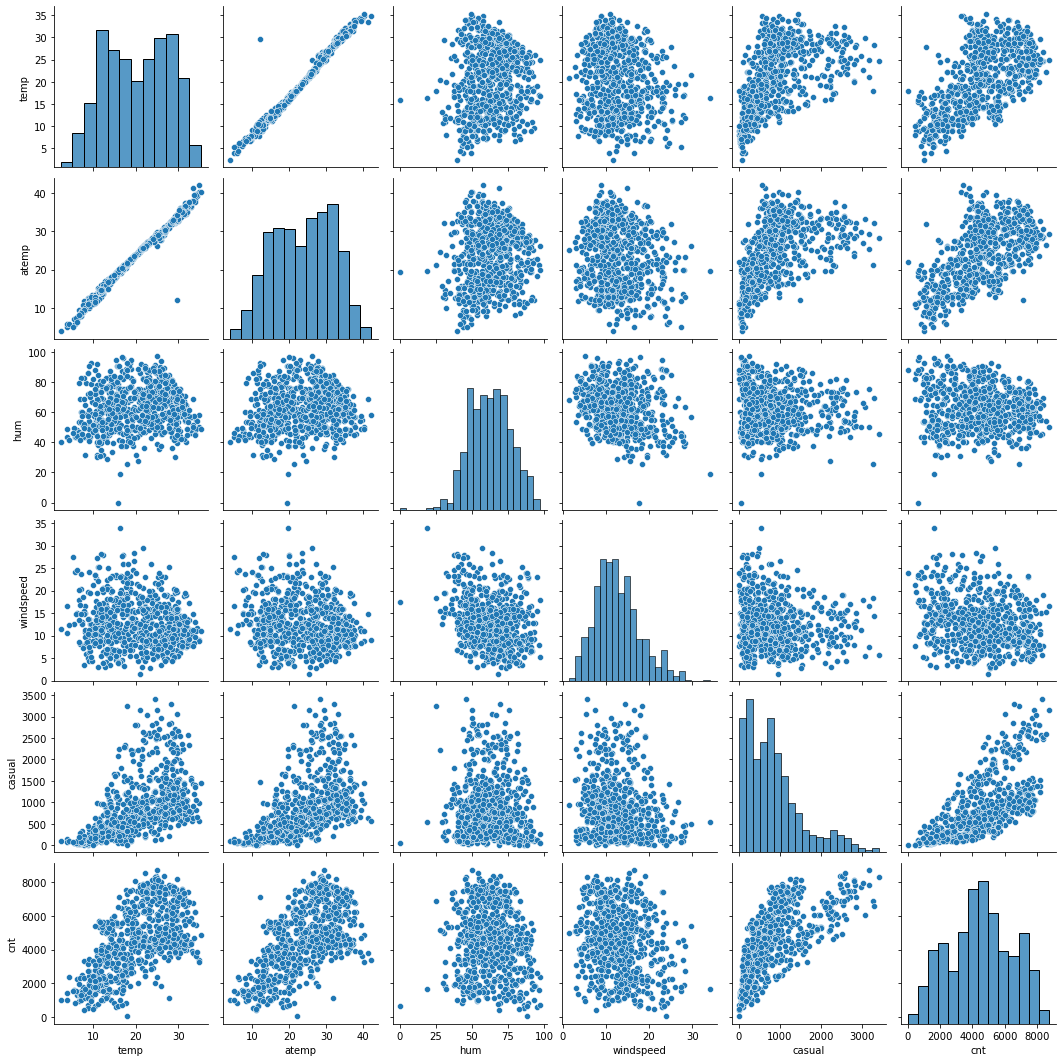

In [325]:
# seperate the numerical variables

num_vars=['temp','atemp','hum','windspeed','casual','cnt']
sns.pairplot(df[num_vars])
plt.show()

- we see a very-strong correlation between atemp and temp. Therefore we will drop `atemp`
- we see linear relationship between atemp and cnt, temp and cnt, casual and cnt

In [326]:
df.drop(['atemp'],axis=1,inplace=True)

In [327]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,82,1518,1600


#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

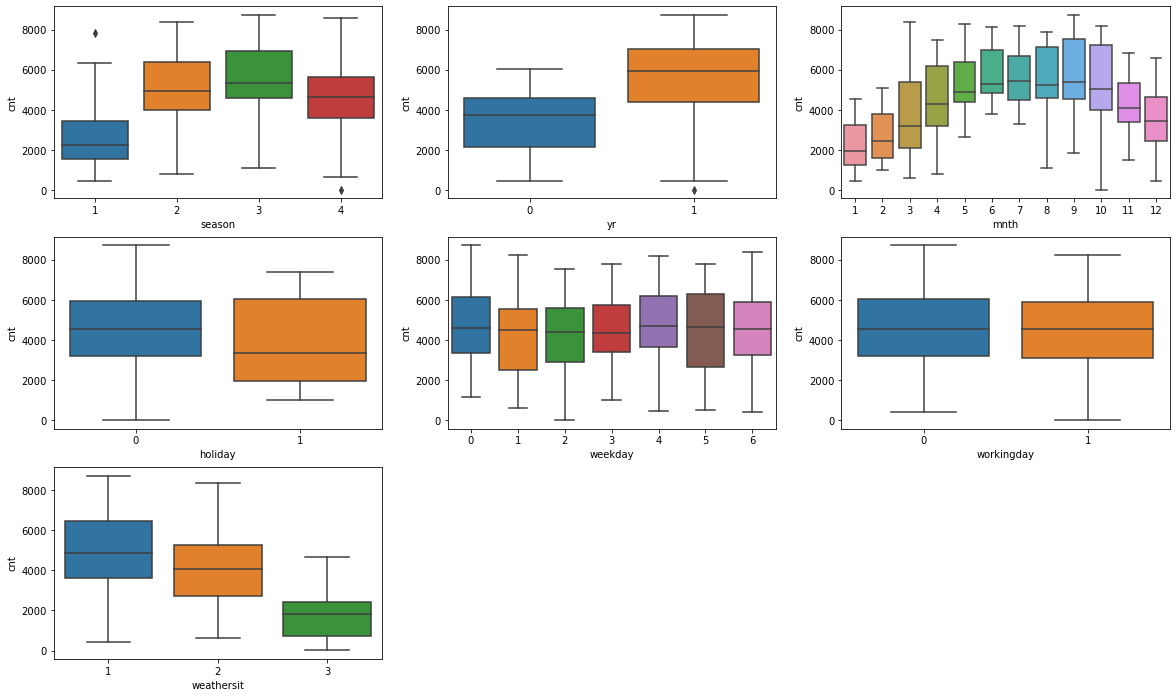

In [328]:
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='cnt',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='cnt',data=df)

## Step 3: Data Preparation

- Check if columns have the correct data types. And change the data types wherever necessary to appropriately represent the information.
- We will create dummy variables for categorical columns with more than two levels.
- We will use business understanding to remove unnecessary columns that are not important to the model.

The columns "season" and "weathersit" are categorical columns. But the numerical values give it an order which is not the case. Therefore we shall change them into string values.

In [329]:
#apply function to change from numerical to string values

df['season']=df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df['weathersit']=df['weathersit'].map({1:'clear',2:'mist',3:'light_rain',4:'heavy_rain'})
df['weekday']=df['weekday'].map({1:'mon',2:'tue',3:'wed',4:'thur',5:'fri',6:'sat'})
df['mnth']=df['mnth'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [330]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,jan,0,mon,1,mist,14.110847,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,jan,0,tue,1,mist,14.902598,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,jan,0,wed,1,clear,8.050924,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,jan,0,thur,1,clear,8.200000,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,jan,0,fri,1,clear,9.305237,43.6957,12.522300,82,1518,1600


### Dummy Variables

The variable `season`, `weathersit`, `weekday`  has more than two levels. We need to convert these levels into integer as well. 

For this, we will use `dummy variables`.

In [331]:
#create a list for which we need dummy variables

dum_vars=['season','mnth','weekday','weathersit']

# Let's drop the first column from status df using 'drop_first = True'

status=pd.get_dummies(df[dum_vars],drop_first=True)

#add the results to the original dataframe

df=pd.concat([df,status],axis=1)

In [332]:
#let us see what our dataframe looks like

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_thur,weekday_tue,weekday_wed,weathersit_light_rain,weathersit_mist
0,1,01-01-2018,spring,0,jan,0,mon,1,mist,14.110847,...,0,0,0,1,0,0,0,0,0,1
1,2,02-01-2018,spring,0,jan,0,tue,1,mist,14.902598,...,0,0,0,0,0,0,1,0,0,1
2,3,03-01-2018,spring,0,jan,0,wed,1,clear,8.050924,...,0,0,0,0,0,0,0,1,0,0
3,4,04-01-2018,spring,0,jan,0,thur,1,clear,8.200000,...,0,0,0,0,0,1,0,0,0,0
4,5,05-01-2018,spring,0,jan,0,fri,1,clear,9.305237,...,0,0,0,0,0,0,0,0,0,0


In [333]:
#drop columns for which we have created dummy variables

df.drop(dum_vars,axis=1,inplace=True)

In [334]:
#we will also drop instant, dteday, casual, registered (because cnt = casual + registered) columns because they are not important to our model

df.drop(['instant','dteday','casual','registered'], axis=1,inplace=True)

In [335]:
#let us see what our dataframe looks like

df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_thur,weekday_tue,weekday_wed,weathersit_light_rain,weathersit_mist
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [336]:
from sklearn.model_selection import train_test_split

#inorder to get the same rows and columns we shall add a random state

np.random.seed(0)

df_train,df_test= train_test_split(df,train_size=0.7,test_size=0.3,random_state=100)

In [337]:
df_train.shape

(510, 28)

In [338]:
df_test.shape

(219, 28)

### Rescaling the Features 

We see that we have some numerical columns with varying scales. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. There we will use standardization so that the units of the coefficients obtained are all on the same scale.

In [339]:
from sklearn.preprocessing import MinMaxScaler

In [340]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep', 'weekday_mon',
       'weekday_sat', 'weekday_thur', 'weekday_tue', 'weekday_wed',
       'weathersit_light_rain', 'weathersit_mist'],
      dtype='object')

In [341]:
scaler=MinMaxScaler()

In [342]:
#apply scalar to all numerical columns. We will not scale our dummy variables

num_vars=['temp','hum','windspeed','cnt']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [343]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_thur,weekday_tue,weekday_wed,weathersit_light_rain,weathersit_mist
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,0,1,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,1,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,0,1


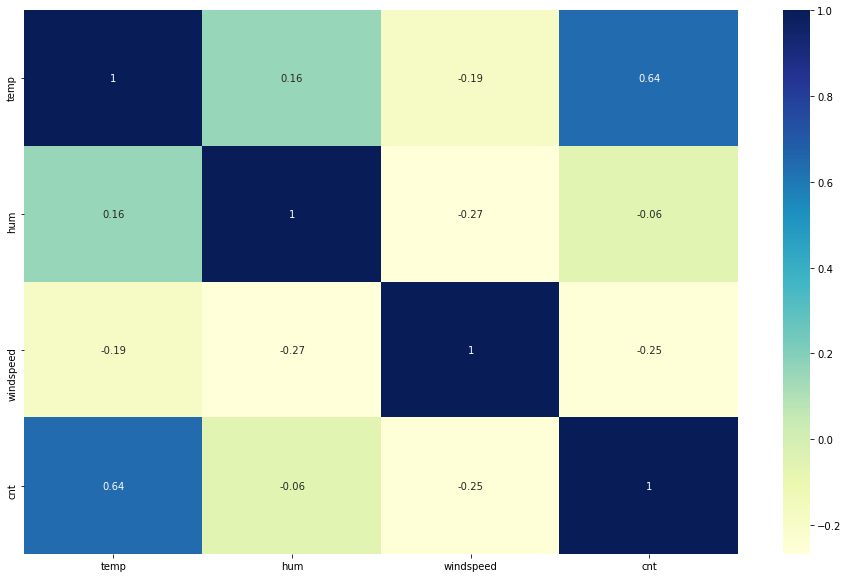

In [344]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize=(16,10))
sns.heatmap(df_train[num_vars].corr(), annot=True, cmap="YlGnBu")
plt.show()

- `temp` has a high correlation with our target variable `cnt`. We shall visualize this with a scatter plot

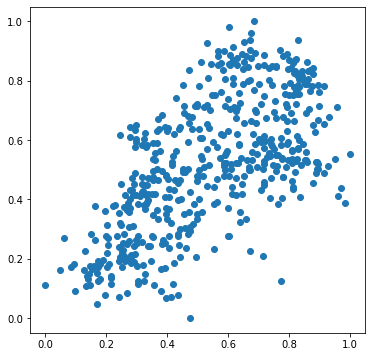

In [345]:
plt.figure(figsize=(6,6))
plt.scatter(df_train['temp'],df_train['cnt'])
plt.show()

### Dividing into X and Y sets for the model building

In [346]:
y_train=df_train.pop('cnt')
X_train=df_train

## Step 5: Building our model

We will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [347]:
#Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [348]:
#running RFE with output number of variable equal to 10

lm=LinearRegression()
lm.fit(X_train,y_train)

rfe=RFE(lm,10)
rfe=rfe.fit(X_train,y_train)

In [349]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 13),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 3),
 ('season_winter', True, 1),
 ('mnth_aug', False, 11),
 ('mnth_dec', False, 6),
 ('mnth_feb', False, 7),
 ('mnth_jan', False, 4),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 17),
 ('mnth_mar', False, 18),
 ('mnth_may', False, 10),
 ('mnth_nov', False, 5),
 ('mnth_oct', False, 15),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', False, 14),
 ('weekday_thur', False, 16),
 ('weekday_tue', False, 8),
 ('weekday_wed', False, 12),
 ('weathersit_light_rain', True, 1),
 ('weathersit_mist', False, 2)]

In [350]:
col=X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_jul', 'mnth_sep', 'weathersit_light_rain'],
      dtype='object')

In [351]:
X_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'weekday_mon', 'weekday_sat', 'weekday_thur', 'weekday_tue',
       'weekday_wed', 'weathersit_mist'],
      dtype='object')

### Linear Model 1: Building model using statsmodel, for the detailed statistics

In [352]:
# Creating X_test dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [353]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [354]:
lm_1 = sm.OLS(y_train,X_train_rfe).fit() #running the first linear model

In [355]:
#let us see the summary of the linear model

print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.9
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          1.53e-184
Time:                        23:01:12   Log-Likelihood:                 489.69
No. Observations:                 510   AIC:                            -957.4
Df Residuals:                     499   BIC:                            -910.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.37

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model.

In [356]:
#check VIF values of feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [357]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X=X_train[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,15.18
2,temp,13.09
4,windspeed,4.02
5,season_spring,2.40
0,yr,2.06
6,season_winter,1.98
7,mnth_jul,1.40
8,mnth_sep,1.20
9,weathersit_light_rain,1.11
1,holiday,1.04


### Model 2

- we see that `hum` has a high VIF. So we will drop this column.

In [358]:
X_train_2=X_train[col]
X_train_2.drop(['hum'],axis=1,inplace=True)

In [359]:
col_2=X_train_2.columns

In [360]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif_2 = pd.DataFrame()
X=X_train_2
vif_2['Features'] = X.columns
vif_2['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_2['VIF'] = round(vif_2['VIF'], 2)
vif_2 = vif_2.sort_values(by = "VIF", ascending = False)
vif_2

,Features,VIF
2,temp,4.40
3,windspeed,3.98
0,yr,2.06
4,season_spring,1.61
5,season_winter,1.37
6,mnth_jul,1.34
7,mnth_sep,1.20
8,weathersit_light_rain,1.06
1,holiday,1.04


In [361]:
#adding a constant variable
X_train_2 = sm.add_constant(X_train_2)

#running the second linear model
lm_2 = sm.OLS(y_train,X_train_2).fit() #running the first linear model

#let us see the summary of the 2nd linear model

print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     228.8
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          5.33e-171
Time:                        23:01:13   Log-Likelihood:                 454.89
No. Observations:                 510   AIC:                            -889.8
Df Residuals:                     500   BIC:                            -847.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.20

### Model 3

We will remove `mnth_jul` and build a model. This variable doesn't seem to have a high magnitude of coefficient (thereby doesn't explain the variance in target variable) and from the box plot analysis we have seen that the july month does not have a very high or low correlation with the target variable.

In [362]:
col_2

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_winter',
       'mnth_jul', 'mnth_sep', 'weathersit_light_rain'],
      dtype='object')

In [363]:
X_train_3=X_train[col_2]
X_train_3.drop(['mnth_jul'],axis=1,inplace=True) #drop the mnth_jul

In [364]:
col_3=X_train_3.columns

In [365]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif_3 = pd.DataFrame()
X=X_train_3
vif_3['Features'] = X.columns
vif_3['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_3['VIF'] = round(vif_3['VIF'], 2)
vif_3 = vif_3.sort_values(by = "VIF", ascending = False)
vif_3

,Features,VIF
3,windspeed,3.91
2,temp,3.62
0,yr,2.05
4,season_spring,1.61
5,season_winter,1.33
6,mnth_sep,1.15
7,weathersit_light_rain,1.06
1,holiday,1.04


In [366]:
#adding a constant variable
X_train_3 = sm.add_constant(X_train_3)

#running the second linear model
lm_3 = sm.OLS(y_train,X_train_3).fit() #running the first linear model

#let us see the summary of the 2nd linear model

print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     251.2
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          6.40e-170
Time:                        23:01:13   Log-Likelihood:                 449.48
No. Observations:                 510   AIC:                            -881.0
Df Residuals:                     501   BIC:                            -842.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.21

### Model 4

We will remove `season_winter`. This variable has a very low magnitude of coefficient and at the same time from our boxplot categorical analysis we observed that there is neither the highest or the lowest amongst the seasons. Therefore it fails to significantly explain the variance in the target variable.

In [367]:
X_train_4=X_train[col_3]
X_train_4.drop(['season_winter'],axis=1,inplace=True) #drop season_winter

In [368]:
col_4=X_train_4.columns

In [369]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif_4 = pd.DataFrame()
X=X_train_4
vif_4['Features'] = X.columns
vif_4['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_4['VIF'] = round(vif_4['VIF'], 2)
vif_4 = vif_4.sort_values(by = "VIF", ascending = False)
vif_4

,Features,VIF
3,windspeed,3.67
2,temp,3.62
0,yr,2.02
4,season_spring,1.50
5,mnth_sep,1.15
6,weathersit_light_rain,1.05
1,holiday,1.03


In [370]:
#adding a constant variable
X_train_4 = sm.add_constant(X_train_4)

#running the second linear model
lm_4 = sm.OLS(y_train,X_train_4).fit() #running the first linear model

#let us see the summary of the 2nd linear model

print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     277.8
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          3.79e-168
Time:                        23:01:13   Log-Likelihood:                 442.41
No. Observations:                 510   AIC:                            -868.8
Df Residuals:                     502   BIC:                            -834.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.27

In [371]:
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     277.8
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          3.79e-168
Time:                        23:01:13   Log-Likelihood:                 442.41
No. Observations:                 510   AIC:                            -868.8
Df Residuals:                     502   BIC:                            -834.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2790      0.019     14.355      0.000       0.241       0.317
yr                        0.2373      0.009     25.942      0.000       0.219       0.255
holiday                  -0.0784      0.029     -2.710      0.007      -0.135      -0.022
temp                      0.3711      0.026     14.352      0.000       0.320       0.422
windspeed                -0.1416      0.028     -5.141      0.000      -0.196      -0.087
season_spring            -0.1452      0.013    -10.821      0.000      -0.172      -0.119
mnth_sep                  0.0592      0.017      3.446      0.001       0.025       0.093
weathersit_light_rain    -0.2497      0.027     -9.197      0.000      -0.303      -0.196
==============================================================================
Omnibus:                       51.310   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.594
Skew:                          -0.650   Prob(JB):                     1.57e-19
Kurtosis:                       4.545   Cond. No.                         9.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Step 6: Assumptions

### Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [372]:
y_train_pred = lm_4.predict(X_train_4)

Text(0.5, 0, 'Errors')

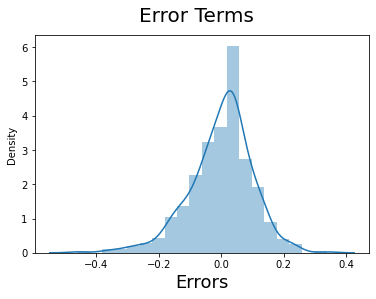

In [373]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [374]:
residuals = y_train - y_train_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 2.911614304776759e-17


As observed from this graph the error terms are normally distributed thus fulfilling a major assumption of linear regression. And the mean of residuals is very close to 0 therefore validating the assumption.

### Linear Relationship between between the numerical variables and the target variable

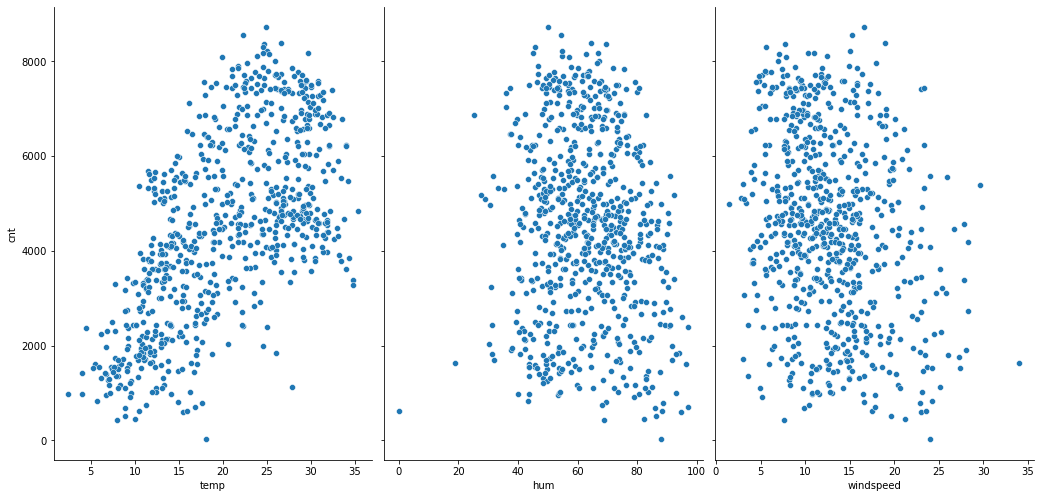

In [375]:
num_vars=['temp','hum','windspeed']
sns.pairplot(df, x_vars=num_vars, y_vars='cnt', size=7, aspect=0.7)

### Homoscedasticity

Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.

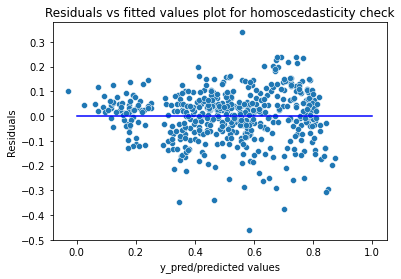

In [376]:
p = sns.scatterplot(y_train_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = sns.lineplot([0,1],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

There is no pattern obtained from the scatter plot. Hence heteroscedasticity is not present.

### There is no multicolinearity between independent variables

In [377]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif_4 = pd.DataFrame()
X=X_train_4[col_4]
vif_4['Features'] = X.columns
vif_4['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_4['VIF'] = round(vif_4['VIF'], 2)
vif_4 = vif_4.sort_values(by = "VIF", ascending = False)
vif_4

,Features,VIF
3,windspeed,3.67
2,temp,3.62
0,yr,2.02
4,season_spring,1.50
5,mnth_sep,1.15
6,weathersit_light_rain,1.05
1,holiday,1.03


## Step 7: Model Interpretation

We concluded the modeling process because based on business understanding we have covered all concerned variables that would affect the demand for shared bikes. Now we shall explore the statistics obtained from `statsmodel`. We find:

- p-value of all coefficients to be below 0.05
- VIF values for all variables to be below 5
- F-statistic is 277.8. As we know higher the F-statistic greater the significance of the model
- prob(f-statistic) ~ 0  meaning the probability that the regression coefficients are zero is '0'.

lm_4 (4th model coefficient values)

- year : 0.237
- holiday : -0.078
- temp : 0.371
- windspeed : -0.141
- season_spring : -0.145
- mnth_sep : 0.059
- weathersit_light_rain : -0.24

The equation of best fitted line based on lm_4 is:

cnt = 0.279 + 0.237* **yr**-0.078* **holiday** +0.371* **temp** -0.141* **windspeed** -0.145* **season_spring** +0.059* **mnth_sep** -0.24* **weathersit_light_rain**

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. second model.

#### Applying the scaling on the test sets

In [378]:
num_vars=['temp','hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars]) #fit on train and transformed on test

In [379]:
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_thur,weekday_tue,weekday_wed,weathersit_light_rain,weathersit_mist
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.837699,0.334206,0.303382,0,0,1,...,0,1,0,0,1,0,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [380]:
df_test.shape

(219, 28)

#### Dividing into X_test and y_test

In [381]:
y_test=df_test.pop('cnt')
X_test=df_test

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

#### Evaluating the 4th model

In [382]:
#include only the columns in the 4th model
X_test_4 = X_test[col_4]

#adding a constant variable
X_test_4 = sm.add_constant(X_test_4)

# Making predictions using the 4th model
y_test_4_pred=lm_4.predict(X_test_4)

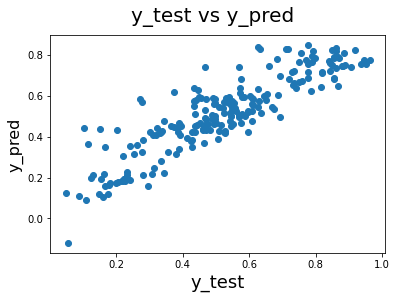

In [383]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_4_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [384]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif_test = pd.DataFrame()
X=X_test_4[col_4]
vif_test['Features'] = X.columns
vif_test['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_test['VIF'] = round(vif_test['VIF'], 2)
vif_test = vif_test.sort_values(by = "VIF", ascending = False)
vif_test

,Features,VIF
3,windspeed,4.45
2,temp,3.88
0,yr,1.84
4,season_spring,1.66
5,mnth_sep,1.15
6,weathersit_light_rain,1.10
1,holiday,1.05


#### Calculating R-squared and Adjusted R-squared values for Test

In [385]:
from sklearn.metrics import mean_squared_error, r2_score

r_squared = r2_score(y_test, y_test_4_pred)

In [386]:
print(r_squared)

0.7831132390575418


In [387]:
# let us calculate the adjusted r-square

n=X_test_4.shape[0]

p=X_test_4.shape[1]

adj_r2=1-(1-r_squared)*(n-1)/(n-p-1)
print(adj_r2)

0.7748508862597339


#### Comparing results for 4th model:

- R-squared for train dataset: 0.795
- Adjusted R-squared for train dataset: 0.792
- R-squared for test dataset: 0.783
- Adjusted R-squared for test dataset: 0.774

As is evident the the R-squared and Adjusted R-squared values for train and test are comparable. We can use this model to generalize other datasets.

## Step 9: Insights

cnt = 0.279 + 0.237* **yr**-0.078* **holiday** +0.371* **temp** -0.141* **windspeed** -0.145* **season_spring** +0.059* **mnth_sep** -0.24* **weathersit_light_rain**

The top variables which affect the demand for shared bikes in the American market are:
- `Temperature` as expected has a massive influence on the demand for bikes. A unit increase in temperature would increase the demand for bikes by 0.371. This would explain the situation in colder countries. When it is really cold outside people would prefer not to travel by bikes.
- `Year` has a positive impact on the target variable. Year on year increase in demand is expected as more and more people become health and environmental conscious. With a unit increase in year the demand will increase by 0.237
- `Light Rain` understandably has a negative influence on the demand for shared bikes. There's usually a drop in temperature when it rains and reduced visibility makes it uncomfortable to ride. Therefore a unit increase in the rain sees a 0.24 decrease in the demand fo shared bikes. 
- `Spring season` is negatively related to the target variable. A unit increase in this variable decreases the demand by 0.145 units. As observed in the categorical analysis using box plots the Spring season sees a massive drop in demand. Alternatively the `Fall season` is the time of the year with most demand.